<a href="https://colab.research.google.com/github/jpcompartir/dl_notebooks/blob/main/numpy_tensor_recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

Recapping Numpy - scalars, vectors, matrices and tensors.

In [2]:
x = np.array(12)
x

array(12)

In [3]:
x.ndim #Recall scalars are rank-0 tensors or single digits

0

In [9]:
x = np.array([12, 3, 6, 14, 7]) #A vector or rank-1 tensor - a list, or array, of scalars
x, x.ndim, x.dtype, x.shape #shape is (5,)

(array([12,  3,  6, 14,  7]), 1, dtype('int64'), (5,))

In [11]:
x = np.array([
              [5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]
])#Now we create a matrix, a rank-2 tensor or an array of vectors, 

In [12]:
x, x.ndim, x.dtype, x.shape 

(array([[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]), 2, dtype('int64'), (3, 5))

In [13]:
x = np.array([[
               [x],
               [x],
               [x]
]]) #Now we create a rank-3 tensor, or 3-d tensor. We could pack rank-3 tensors into an array and create a rank-4 tensor, and so on and so forth

The key descriptions of a tensor are its: 
number of axes, or rank, a rank-3 tensor has 3 axes, and a matrix has two axes. 
shape - a tuple of integers that describes how many dimensions the tensor has along each axis. So vectors have no shape - they have no axes, a vector has a shape with a single element, which itself has a dimension (the number of scalars in the vector)

data type - float16, float32, float64, unit8 and so on. Can also be strings.

In [15]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [17]:
train_images.ndim, train_images. shape #Rank-3 tensor, an array of 60,000 matrices of 28 x 28 integers. Each matrix is a grayscale image of coefficients between 0 and 255

(3, (60000, 28, 28))

In [19]:
train_images.dtype

dtype('uint8')

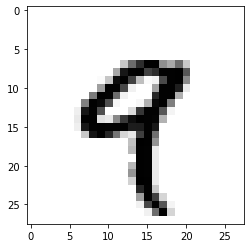

In [20]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Now we we need to look into how to manipulate tensors, we'll start with slicing. 


In [21]:
my_slice = train_images[10:100] #(== [10:100, :, :]) == [10:100, 0:28, 0:28] == [10:100, :28, :28]
my_slice.shape

(90, 28, 28)

Can also slice just the 14x14 pixels in the bottom right corner of each image:

In [22]:
my_slice = train_images[:, 14:, 14:]

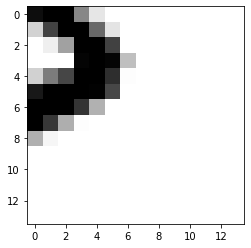

In [25]:
plt.imshow(my_slice[0], cmap = plt.cm.binary)

Or the pixels in the centre:

In [26]:
my_slice = train_images[:, 7:-7, 7:-7] #Recalling that in python negative slices start counting backwards from the end.

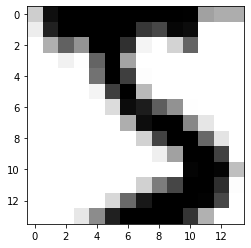

In [27]:
plt.imshow(my_slice[0], cmap = plt.cm.binary)

Generally in tensorflow, and thus Keras, the first axis of a tensor is the samples axis - it tells us how many samples there are in the tensor. Due to memory-constraints, and the nature of parallelisation when using GPUs, we usually batch our data.

In [28]:
batch_1 = train_images[:128]
batch_2 = train_images[128:256]

But we wouldn't want to type out batch_3...batch_4...batch_5, so we use a bit of maths to determine the nth batch.

In [29]:
n = 3
batch_n = train_images[128 * n:128 * (n+1)]

In [59]:
np.arange(3,128) + (128*(n+1))

array([515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527,
       528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540,
       541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553,
       554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566,
       567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579,
       580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592,
       593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605,
       606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618,
       619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631,
       632, 633, 634, 635, 636, 637, 638, 639])

Making tensors more concrete with common examples:
vector data Rank-2 tensors of shape (samples, features) - i.e. data frame
timeseries data Rank-3 tensors of shape (samples, timesteps, features)
images - Rank-4 tensors of shape (samples, height, width, channels)
video - Rank-5 tensors of shape (samples, frames, height, width, channels



Tensor Operations

In a previous MNIST implementation we stacked two denser neural layers on top of one another. We used a RELU activation in one, and a softmax in the second. The first layer takes a matrix as an input and returns another matrix - a new representation. Where W is a matrix, and b is a vector, the transformation is an affine transformation, the matrix multiplication of the input and W, plus b. As matrices are rank-2 tensors, we can see this as a tensor * tensor multiplication, followed by a matrix + vector addition of the matrix which is output by the tensor multiplciation.

The relu operation and the addition are element-wise operations - they are applied independently to each entry of the tensors. They can be imlemented naively as for-loops or they can be vectorised (they're open to parallelisation)

In [66]:
def naive_relu(x):
  assert(len(x.shape) ==2)
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [72]:
def naive_vector_addition(x, y ):
  assert(len(x.shape)== 2)
  assert(x.shape == y.shape)
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [70]:
x = np.array([
              [2, 3, 1,2],
              [3, 2, 1, 2]
])
y = x

In [76]:
z = naive_vector_addition(x,y)


array([[4, 6, 2, 4],
       [6, 4, 2, 4]])

In [79]:
naive_relu(x *-1)

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

Or using the already-optimised numpy:

In [82]:
z = x + y
z = np.maximum(z, 0.)

In [83]:
z

array([[4., 6., 2., 4.],
       [6., 4., 2., 4.]])

This shows what the reluactivation function does, either we take the maximum value of each element, or if that maximum value is below 0, we take 0. Now we can compare the speed of our naive implementations and their numpy counterparts

In [84]:
import time

In [87]:
x = np.random.random((20, 100))
y = np.random.random((20, 100))

In [89]:
t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.)
print("Took: {0: .2f} s".format(time.time()-t0))

Took:  0.01 s


In [90]:
t0 = time.time()
for _ in range(1000):
  z = naive_vector_addition(x, y)
  z = naive_relu(z)
print("Took: {0: .2f} s".format(time.time()- t0))

Took:  2.80 s


About 280* faster than the naive implementation! Next we'll look at broadcasting - which is an important means of extending tensor/matrix operations to objects which don't naturally have the same shape/dimensions, or shapes/dimensions that are compatible according to the rules of tensor/matrix operations, i.e. mxn matrix can only multiply with nx? matrices